### Import libraries

In [1]:
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models

### Draw images loaded

In [2]:
path = "../dataset.hdf5"
f = h5py.File(path, "r")

train_images = np.copy(f.get('train').get('images'))
train_labels = np.copy(f.get('train').get('labels'))
test_images = np.copy(f.get('test').get('images'))
test_labels = np.copy(f.get('test').get('labels'))

width, height = f.get('shape')

f.close()

### Test dataset

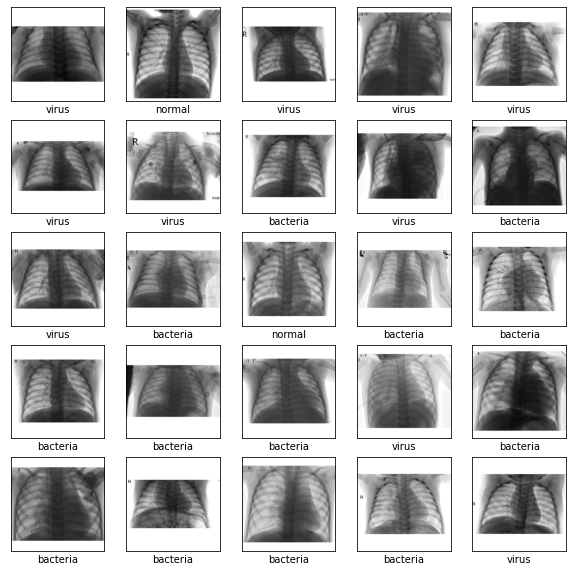

In [3]:
class_names = ['normal', 'bacteria', 'virus']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Train with Tensorflow

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
163/163 [==============================] - 162s 993ms/step - loss: 1.0789 - accuracy: 0.5966 - val_loss: 0.8074 - val_accuracy: 0.6122
Epoch 2/10
163/163 [==============================] - 163s 1s/step - loss: 0.5410 - accuracy: 0.7577 - val_loss: 1.0828 - val_accuracy: 0.6939
Epoch 3/10
163/163 [==============================] - 162s 997ms/step - loss: 0.4619 - accuracy: 0.7853 - val_loss: 0.8536 - val_accuracy: 0.7292
Epoch 4/10
163/163 [==============================] - 162s 993ms/step - loss: 0.4150 - accuracy: 0.8157 - val_loss: 1.2070 - val_accuracy: 0.7179
Epoch 5/10
163/163 [==============================] - 162s 995ms/step - loss: 0.3302 - accuracy: 0.8541 - val_loss: 1.6439 - val_accuracy: 0.6955
Epoch 6/10
163/163 [==============================] - 162s 996ms/step - loss: 0.2783 - accuracy: 0.8799 - val_loss: 1.6588 - val_accuracy: 0.6458
Epoch 7/10
163/163 [==============================] - 159s 975ms/step - loss: 0.2230 - accuracy: 0.9105 - val_loss: 2.4039 - va

### Model evaluation

20/20 - 4s - loss: 2.9298 - accuracy: 0.6458
0.6458333134651184


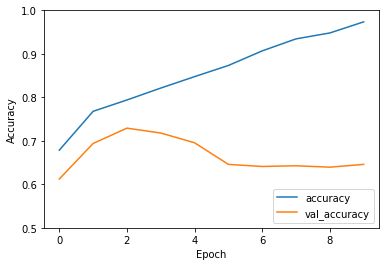

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

### Save the model

In [6]:
model.save("../model/cnn/all")

INFO:tensorflow:Assets written to: ../model/cnn/all/assets
